In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import DicomPipeLine 

In [3]:
main_data_source_path = r'C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Liver tumor'
preprocessed_data_path = r'C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed'
sub_folders_to_scan_for = ['2','3','4','5']

In [4]:
# main_data_source_path = r'F:\Final Year Project\Data Pipeline\DataBase_1'
# preprocessed_data_path = r'F:\Final Year Project\Data Pipeline\TestDataBase_2'
# sub_folders_to_scan_for = ['2','3','4','5']

In [5]:
path_obj = DicomPipeLine.Path_Settings(main_data_source_path, preprocessed_data_path, sub_folders_to_scan_for)

In [6]:
streamer = DicomPipeLine.Stream_Data(path_obj)

In [8]:
ct_array = streamer.get('1', 'CT PLAIN')
pet_array = streamer.get('1', 'PET WB  (AC)')

C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed\1\CT PLAIN.pickle.gzip
C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed\1\PET WB  (AC).pickle.gzip


In [9]:
ct = ct_array[362]
pt = pet_array[362]

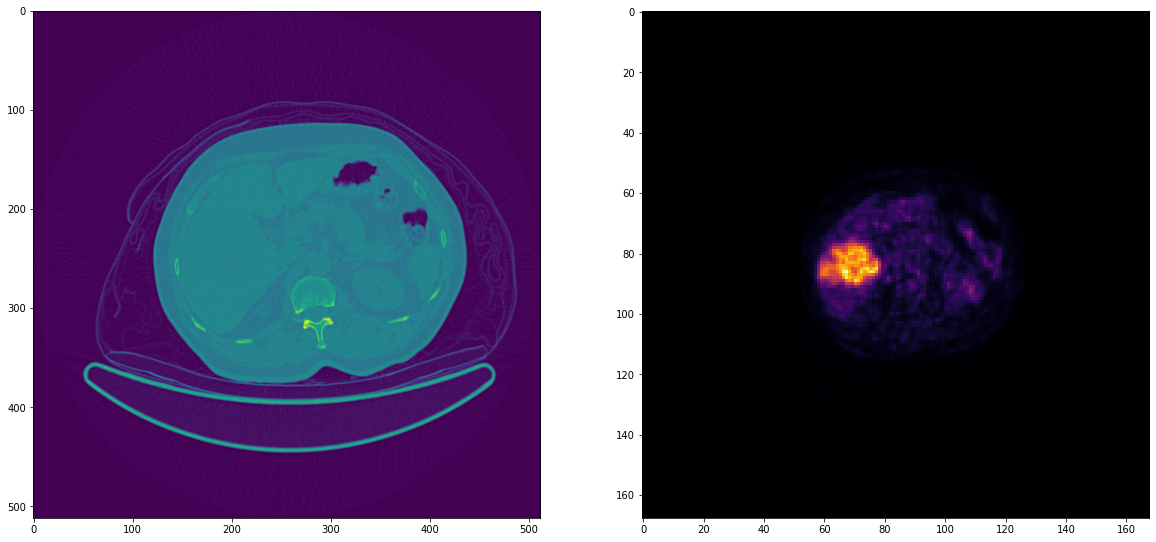

In [10]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(ct)
plt.subplot(1,2,2)
plt.imshow(pt, cmap = 'inferno')

In [7]:
def NORMALIZE(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

In [8]:
%matplotlib inline
def PLOT(img, cmap, f_size):
    plt.figure(figsize = f_size)
    plt.imshow(img, cmap = cmap)

In [9]:
from skimage.transform import resize

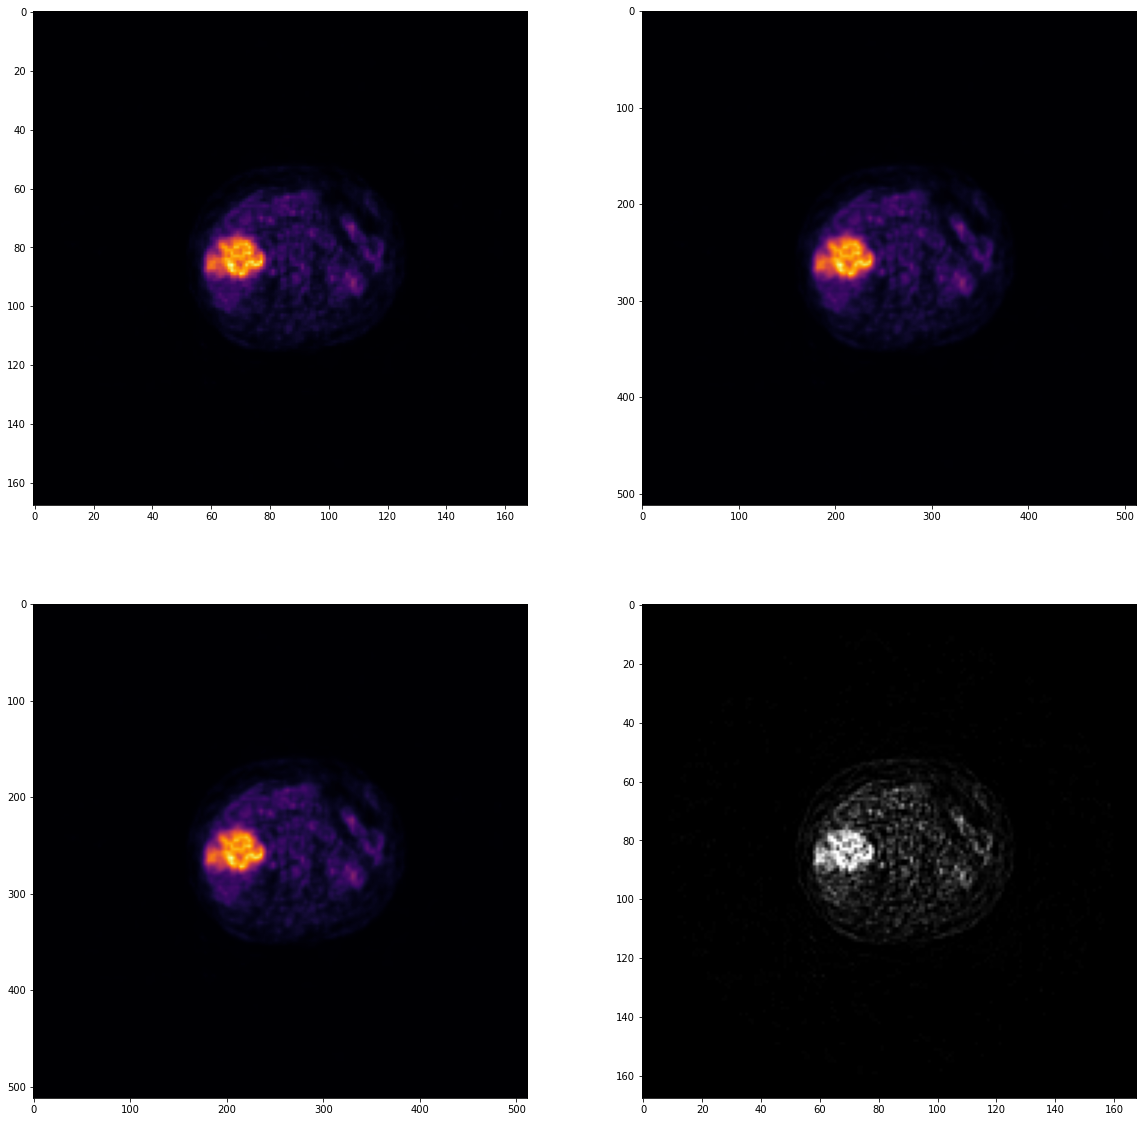

In [16]:
pt = NORMALIZE(pt)
test_img_t = resize(pt, (ct.shape[0], ct.shape[1]),anti_aliasing=True)
test_img_f = resize(pt, (ct.shape[0], ct.shape[1]),anti_aliasing=False)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
test_img_s = cv2.filter2D(src=pt, ddepth=-1, kernel=kernel)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.imshow(pt, cmap = 'inferno')

plt.subplot(2,2,2)
plt.imshow(test_img_t, cmap = 'inferno')

plt.subplot(2,2,3)
plt.imshow(test_img_f, cmap = 'inferno')

plt.subplot(2,2,4)
plt.imshow(test_img_s, cmap = 'gray')

In [20]:
%matplotlib notebook  
# interactive chart/plot
def Interactive_Plot(a_args, b_args, num_pts, fig_size):
    
    img_a, cmap_a = a_args
    img_b, cmap_b = b_args
    
    a_pts = []
    b_pts = []
    
    fig = plt.figure(figsize = fig_size)
    a = fig.add_subplot(121)
    a.imshow(img_a, cmap = cmap_a)
    b = fig.add_subplot(122)
    b.imshow(img_b, cmap = cmap_b)
    
    def onclick(event):
        if event.inaxes == a:      # inaxis=cursor hover event a=1st image
            if event.button == 1:  # button = mouse click event; 1=left click
                if len(a_pts) < num_pts:  # stop after 5 points
                    a_pts.append((int(event.xdata), int(event.ydata)))
                    a.text(0, 0, f"{a_pts}", va="bottom", ha="left") #display points on top of image
        elif event.inaxes == b: # for 2nd image
            if event.button == 1:
                if len(b_pts) < num_pts:
                    b_pts.append((int(event.xdata), int(event.ydata)))
                    b.text(0, 0, f"{b_pts}", va="bottom", ha="left")
                
    cid = fig.canvas.mpl_connect('button_press_event', onclick) # button_press_event = predefined, call onclick fn
    return a_pts, b_pts

<IPython.core.display.Javascript object>


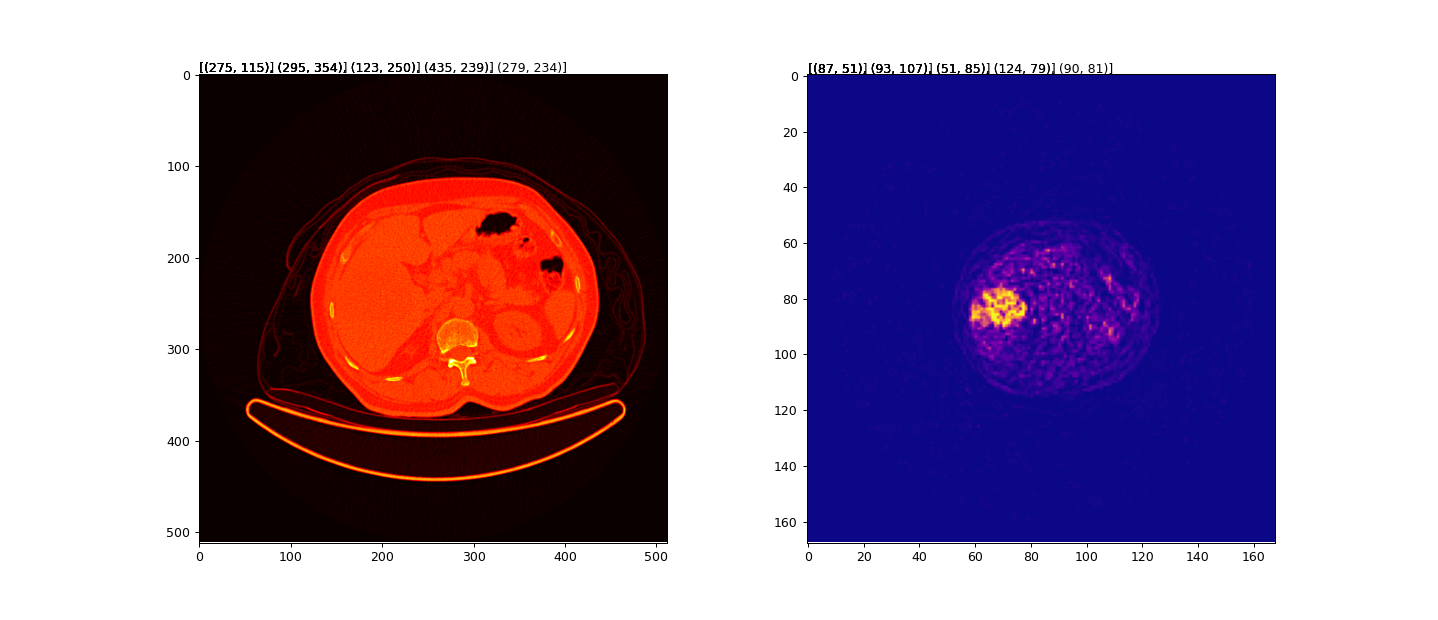

In [23]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
test_img_s = cv2.filter2D(src=pt, ddepth=-1, kernel=kernel)

ct_arguments = (ct, 'hot')
pt_arguments = (test_img_s, 'plasma')
num_pts = 5
figure_size = (10, 10)


ct_pts, pt_pts = Interactive_Plot(ct_arguments, pt_arguments, num_pts, figure_size)

In [24]:
ct_pts = np.asarray(ct_pts)
ct_pts

array([[275, 115],
       [295, 354],
       [123, 250],
       [435, 239],
       [279, 234]])

In [25]:
pt_pts = np.asarray(pt_pts)
pt_pts

array([[ 87,  51],
       [ 93, 107],
       [ 51,  85],
       [124,  79],
       [ 90,  81]])

In [27]:
streamer.save_transform_points('1', ct, pt, ct_pts, pt_pts)

In [28]:
pet_Tx = streamer.save_obj.load(r'C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed\1\transformation_points.pickle.gzip')
pet_Tx

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[275, 115],
        [295, 354],
        [123, 250],
        [435, 239],
        [279, 234]]),
 array([[ 87,  51],
        [ 93, 107],
        [ 51,  85],
        [124,  79],
        [ 90,  81]])]

In [10]:
ct_frames, pt_frames = streamer.get_scans('1', 'CT PLAIN', 'PET WB  (AC)', transform = True)

C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed\1\CT PLAIN.pickle.gzip
C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed\1\PET WB  (AC).pickle.gzip


In [11]:
import pywt

In [12]:
def fuseCoeff(cooef1, cooef2, method):

    if (method == 'mean'):
        cooef = (cooef1 + cooef2) / 2
    elif (method == 'min'):
        cooef = np.minimum(cooef1,cooef2)
    elif (method == 'max'):
        cooef = np.maximum(cooef1,cooef2)
    else:
        cooef = []

    return cooef

In [13]:
def Fusion_Method_1(img_a, img_b):
    
    # Params
    FUSION_METHOD = 'mean' # Can be 'min' || 'max || anything you choose according theory

    # Read the two image
    I2 = img_a
    I1 = img_b

    # We need to have both images the same size
    # I2 = cv2.resize(I2,I1.shape) # I do this just because i used two random images

    ## Fusion algo

    # First: Do wavelet transform on each image
    wavelet = 'haar'
    cooef1 = pywt.wavedec2(I1[:,:], wavelet)
    cooef2 = pywt.wavedec2(I2[:,:], wavelet)
#     print(cooef1)
    # print(cooef2)

    # Second: for each level in both image do the fusion according to the desire option
    fusedCooef = []
    for i in range(len(cooef1)-1):

        # The first values in each decomposition is the apprximation values of the top level
        if(i == 0):

            fusedCooef.append(fuseCoeff(cooef1[0],cooef2[0],FUSION_METHOD))

        else:

            # For the rest of the levels we have tupels with 3 coeeficents
            c1 = fuseCoeff(cooef1[i][0], cooef2[i][0], FUSION_METHOD)
            c2 = fuseCoeff(cooef1[i][1], cooef2[i][1], FUSION_METHOD)
            c3 = fuseCoeff(cooef1[i][2], cooef2[i][2], FUSION_METHOD)

            fusedCooef.append((c1,c2,c3))

    # Third: After we fused the cooefficent we need to transfor back to get the image
    fusedImage = pywt.waverec2(fusedCooef, wavelet)

    # Forth: normmalize values to be in uint8
    fusedImage = np.multiply(np.divide(fusedImage - np.min(fusedImage),(np.max(fusedImage) - np.min(fusedImage))),255)
    fusedImage = fusedImage.astype(np.uint8)

    return fusedImage

In [64]:
cv2.namedWindow('Fusion method 1',cv2.WINDOW_NORMAL)
cv2.resizeWindow('Fusion method 1', 600,600)

# cv2.namedWindow('Fusion method 2',cv2.WINDOW_NORMAL)
# cv2.resizeWindow('Fusion method 2', 600,600)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

cmap = plt.get_cmap('seismic')

fused_arr = []

i = 0
# while i >= 0 and i < len(ct):
while True:
    
    ct = NORMALIZE(ct_frames[i])
    pt = NORMALIZE(pt_frames[i])
    
    pt_filtered = cv2.filter2D(src = pt, ddepth=-1, kernel=kernel)
    
    fused_frame_1 = Fusion_Method_1(ct, pt)
#     fused_frame_2 = Fusion_Method_1(ct, pt_filtered)

    
    fused_arr.append(fused_frame_1)
    
    

    ff_c1 = cmap(fused_frame_1)
    ff_c1 = (ff_c1[:, :, :3] * 255).astype(np.uint8)
    cv2.imshow('Fusion method 1', fused_frame_1)
#     cv2.imshow('Fusion method 2', np.invert(ff_c1))
    
    
#     ff_c2 = cmap(fused_frame_2)
#     ff_c2 = (ff_c2[:, :, :3] * 255).astype(np.uint8)
#     cv2.imshow('Fusion method 2', np.invert(ff_c2))

#     print(ff_c_1.shape)
    
    
    current_key = cv2.waitKey(0)
    if current_key & 0xFF == ord('b'):
        if i>0:
            i -= 1
        continue
    if current_key & 0xFF == ord('q'):
        break
    if i<ct_frames.shape[0]-1: 
        i += 1
    
cv2.destroyAllWindows()

In [66]:
len(fused_arr)

596

In [70]:
import SimpleITK as sitk
import os
# fused_arr = np.array(fused_arr)

for i,x in enumerate(fused_arr):
    img = sitk.GetImageFromArray(x)
    path = os.path.join(r'C:\Users\vikra\Codes\Tumor_Codes\Final_Project_git\Preprocessed\1\DCM_after_test', f'{i+1}.dcm')
    sitk.WriteImage(img, path)

In [18]:
# import registration

In [19]:
# t_obj = registration.TransFormation(ct, pt, ct_pts, pt_pts)

In [20]:
# t_obj.info()

In [21]:
# img_tr = t_obj.transform(pt)

In [22]:
# PLOT(img_tr, 'inferno', (6, 6))

In [23]:
# cmap = plt.get_cmap('inferno')
# img_tr = NORMALIZE(img_tr)
# img_tr_inferno = cmap(img_tr)

# cv2.imshow('inferno', img_tr_inferno)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# img_tr_inferno = (img_tr_inferno[:, :, :1] * 255).astype(np.uint8)

# cv2.imshow('inferno', img_tr_inferno)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.imshow(img_tr_inferno)

In [ ]:
def cmap_rgb(img):
    img = cmap(img)
    return (img[:, :, :3] * 255).astype(np.uint8)

In [ ]:
ct_frames = streamer.get('2', 'CT PLAIN')
pt_frames = streamer.get('2', 'PET WB  (AC)')


In [ ]:
for ct, pt in zip(ct_frames, pt_frames):
    
    pt = t_obj.transform(pt)
    
    ct = NORMALIZE(ct)              
    pt = NORMALIZE(pt)
    
    cv2.imshow('CT Image', ct)
    cv2.imshow('PET Image', pt)
    
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()

In [20]:
import pywt

In [21]:
# This function does the coefficient fusing according to the fusion method
def fuseCoeff(cooef1, cooef2, method):

    if (method == 'mean'):
        cooef = (cooef1 + cooef2) / 2
    elif (method == 'min'):
        cooef = np.minimum(cooef1,cooef2)
    elif (method == 'max'):
        cooef = np.maximum(cooef1,cooef2)
    else:
        cooef = []

    return cooef

In [22]:

def Fusion_Method_1(img_a, img_b):
    
    # Params
    FUSION_METHOD = 'mean' # Can be 'min' || 'max || anything you choose according theory

    # Read the two image
    I2 = img_a
    I1 = img_b

    # We need to have both images the same size
    # I2 = cv2.resize(I2,I1.shape) # I do this just because i used two random images

    ## Fusion algo

    # First: Do wavelet transform on each image
    wavelet = 'haar'
    cooef1 = pywt.wavedec2(I1[:,:], wavelet)
    cooef2 = pywt.wavedec2(I2[:,:], wavelet)
    # print(cooef1)
    # print(cooef2)

    # Second: for each level in both image do the fusion according to the desire option
    fusedCooef = []
    for i in range(len(cooef1)-1):

        # The first values in each decomposition is the apprximation values of the top level
        if(i == 0):

            fusedCooef.append(fuseCoeff(cooef1[0],cooef2[0],FUSION_METHOD))

        else:

            # For the rest of the levels we have tupels with 3 coeeficents
            c1 = fuseCoeff(cooef1[i][0], cooef2[i][0], FUSION_METHOD)
            c2 = fuseCoeff(cooef1[i][1], cooef2[i][1], FUSION_METHOD)
            c3 = fuseCoeff(cooef1[i][2], cooef2[i][2], FUSION_METHOD)

            fusedCooef.append((c1,c2,c3))

    # Third: After we fused the cooefficent we need to transfor back to get the image
    fusedImage = pywt.waverec2(fusedCooef, wavelet)

    # Forth: normmalize values to be in uint8
    fusedImage = np.multiply(np.divide(fusedImage - np.min(fusedImage),(np.max(fusedImage) - np.min(fusedImage))),255)
    fusedImage = fusedImage.astype(np.uint8)

    return fusedImage

In [21]:
ct_frames = streamer.get('1', 'CT PLAIN')
pt_frames = streamer.get('1', 'PET WB  (AC)')

F:\Final Year Project\Data Pipeline\TestDataBase_2\1\CT PLAIN.pickle.gzip
F:\Final Year Project\Data Pipeline\TestDataBase_2\1\PET WB  (AC).pickle.gzip


In [23]:
import DicomPipeLine

In [18]:
ct_frames, pt_frames = streamer.get_scans('1', 'CT PLAIN', 'PET WB  (AC)', transform = True)

F:\Final Year Project\Data Pipeline\TestDataBase_2\1\CT PLAIN.pickle.gzip
F:\Final Year Project\Data Pipeline\TestDataBase_2\1\PET WB  (AC).pickle.gzip


%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)